In [1]:
import torch 
import numpy as np 
print(torch.cuda.is_available())        
print(torch.cuda.get_device_name(0)) 

True
NVIDIA GeForce RTX 2050


In [2]:
print(torch.__version__)
print(torch.version.cuda)

2.5.1+cu121
12.1


### Tensor

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(type(x_data), x_data)

<class 'torch.Tensor'> tensor([[1, 2],
        [3, 4]])


In [4]:
np_arr = np.array(data)
x_np_tensor = torch.from_numpy(np_arr)
print(x_np_tensor)

tensor([[1, 2],
        [3, 4]])


In [5]:
x_ones = torch.ones_like(x_data) # retains properties of x_data
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float) # random float
print(x_rand) 

tensor([[1, 1],
        [1, 1]])
tensor([[0.6439, 0.7124],
        [0.3375, 0.6761]])


In [6]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.2197, 0.6947, 0.3104],
        [0.0102, 0.6113, 0.6576]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
print(rand_tensor.shape)
print(rand_tensor.dtype)
print(rand_tensor.device)

torch.Size([2, 3])
torch.float32
cpu


In [8]:
tensor = torch.ones(4, 4)
print(tensor[0])
print(tensor[:, 0])
print(tensor[..., -1])
tensor[:, 1] = 0
print(tensor)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)

print(t1) # 1 adds col wise 0 adds row wise 

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [10]:
# n x p X p x m = n x m 
y1 = tensor @ tensor.T # mat mul
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3) # provide structure

# n x p . n x p = n x p
z1 = tensor * tensor # element wise product 
z2 = tensor.mul(tensor) # mul

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(y1)
print(y2)
print(y3)

print(z1)
print(z2)
print(z3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Datasets

In [11]:
from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

In [ ]:
training_data = datasets.FashionMNIST(
    root ='data', train = True, download= True, 
    transform= ToTensor() 
)

test_data = datasets.FashionMNIST(
    root ='data', train = False, download= True, 
    transform= ToTensor() 
)

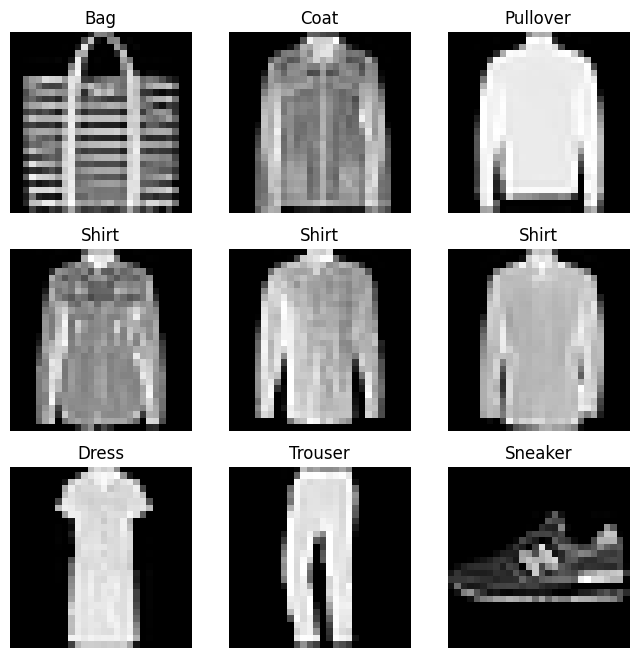

In [13]:
labels_map = {
    0 : 'T-Shirt', 
    1 : 'Trouser', 
    2 : 'Pullover', 
    3 : 'Dress', 
    4 : 'Coat', 
    5 : 'Sandal', 
    6 : 'Shirt', 
    7 : 'Sneaker', 
    8 : 'Bag', 
    9 : 'Ankle Boot'
}

fig = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows+1) : 
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

#### Custom Data set 

In [14]:
import os 
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset) : 
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None) : 
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self) : 
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform : 
            image = self.transform(image)
        if self.target_transform : 
            label = self.target_transform(label)

        return image, label 

In [15]:
from torch.utils.data import DataLoader

# shuffle the batches 
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

torch.Size([64, 1, 28, 28])
torch.Size([64])
T-Shirt


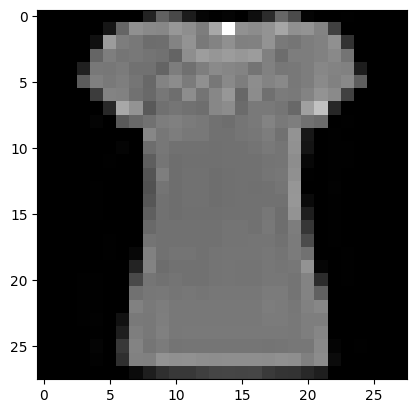

In [16]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
print(labels_map[label.item()])
plt.show()